<a href="https://colab.research.google.com/github/jd19l009/IMPP/blob/main/fromgit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

最初に作業スペースとしてGoogle Driveをマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

モジュールをインストールし、システムが参照するルートパスを指定

In [ ]:
!pip install XlsxWriter
!pip install eventstudy
!git clone https://github.com/LemaireJean-Baptiste/eventstudy.git "drive/My Drive/Colab Notebooks/temp"
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/temp')

各種モジュールをインポート

In [184]:
import eventstudy as es
from eventstudy import excelExporter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from pandas_datareader.stooq import StooqDailyReader
import datetime as dt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

対象企業のリターンデータのCSVとFama3Factorデータの読み込み

In [185]:
#es.Single.import_returns('/content/drive/My Drive/Colab Notebooks/temp/example/returns_GAFAM.csv')
es.Single.import_returns('/content/drive/MyDrive/Colab Notebooks/temp/example/mm.csv')
#es.Single.import_FamaFrench('/content/drive/My Drive/Colab Notebooks/temp/example/famafrench.csv')

In [285]:
#本庶氏が小野薬品を提訴（令和2年（ワ）第5608）（有意差なし）
source = [{
    "security_ticker": "ONO",
    "market_ticker": 'TOPIX',
    "event_date": '2020-06-05',
}]

In [287]:
#和解が成立し、小野薬品が総額280億円を支払う（有意差なし）
source = [{
    "security_ticker": "ONO",
    "market_ticker": 'TOPIX',
    "event_date": '2021-11-12',
}]

In [289]:
#本庶氏ノーベル賞受賞決定
source = [{
    "security_ticker": "ONO",
    "market_ticker": 'TOPIX',
    "event_date": '2018-10-01',
}]

In [292]:
#通期業績予想の修正に関するお知らせ（正の有意差あり）
source = [{
    "security_ticker": "ONO",
    "market_ticker": 'TOPIX',
    "event_date": '2021-05-13',
}]

イベントスタディの実行（イベントウィンドウ等の設定）

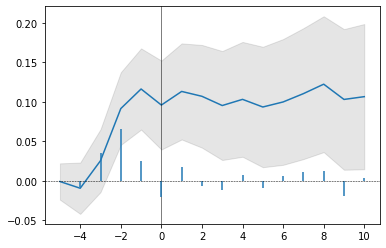

,AR,Std. E. AR,CAR,Std. E. CAR,T-stat,P-value
-5,-0.001,0.01375,-0.001,0.01375,-0.07,0.94
-4,-0.009,0.01375,-0.01,0.01945,-0.49,0.63
-3,0.035,0.01375,0.025,0.02382,1.06,0.29
-2,0.066,0.01375,0.091 ***,0.02750,3.32,0.00
-1,0.025,0.01375,0.116 ***,0.03075,3.78,0.00
0,-0.020,0.01375,0.096 **,0.03368,2.84,0.01
1,0.017,0.01375,0.113 ***,0.03638,3.11,0.00
2,-0.006,0.01375,0.107 **,0.03889,2.75,0.01
3,-0.012,0.01375,0.095 **,0.04125,2.31,0.02
4,0.008,0.01375,0.103 **,0.04348,2.37,0.02


In [294]:
results = []
results_full = []
for item in source:
    event = es.Single.market_model(
        security_ticker = item['security_ticker'],
        market_ticker = item['market_ticker'],
        event_date = np.datetime64(item['event_date']),
        event_window = (-5,10), 
        estimation_size = 60,
        buffer_size = 60
    )
results_full.append(event)
event.plot(AR=True,confidence=.95)
plt.show()
event.results(decimals=[3,5,3,5,2,2])

以下、参考コード

In [65]:
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2022, 12, 31)

df = pdr.DataReader('4528.JP', 'stooq', start_date, end_date)
df['Returns'] = df['Close'].pct_change()
df.to_csv('ONO.csv', columns=['Returns'])

df = pdr.DataReader('^TPX', 'stooq', start_date, end_date)
df['Returns'] = df['Close'].pct_change()
df.to_csv('TOPIX.csv', columns=['Returns'])


CSVにデータを注ぎ出し、吐き出すコード

In [ ]:
df = pdr.DataReader('4528.JP', 'stooq', start_date, end_date)
df['Returns'] = df['Close'].pct_change()
df.to_csv('mmc.csv', columns=['Returns'])
df = pd.read_csv('mmc.csv', index_col=0)
df.to_csv('mmc.csv')

#df = pdr.DataReader('^TPX', 'stooq', start_date, end_date)
#df['Returns'] = df['Close'].pct_change()
#df.to_csv('mmc.csv', columns=['Returns'],mode='a')

In [30]:
def get_price(code):
    df = pd.read_csv(f'https://stooq.com/q/d/l/?s={code}&i=d',index_col=0)
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Tokyo')
    return df

#df = get_price('4528.JP')
#print(df.head)
df = get_price('^TPX')
print(df.head)


<bound method NDFrame.head of                               Open     High      Low    Close        Volume
Date                                                                       
2004-03-31 00:00:00+09:00  1175.70  1180.65  1163.79  1179.23           NaN
2004-04-01 00:00:00+09:00  1182.05  1185.34  1171.62  1175.01           NaN
2004-04-02 00:00:00+09:00  1178.35  1187.50  1176.65  1184.20           NaN
2004-04-05 00:00:00+09:00  1195.80  1202.33  1195.33  1199.24           NaN
2004-04-06 00:00:00+09:00  1206.21  1210.02  1195.83  1209.44           NaN
...                            ...      ...      ...      ...           ...
2023-02-27 00:00:00+09:00  1983.27  1993.82  1983.16  1992.78  1.024924e+09
2023-02-28 00:00:00+09:00  1997.64  2001.42  1990.61  1993.28  1.437105e+09
2023-03-01 00:00:00+09:00  1989.38  1997.81  1984.88  1997.81  1.166763e+09
2023-03-02 00:00:00+09:00  2001.67  2004.54  1991.10  1994.57  1.150589e+09
2023-03-03 00:00:00+09:00  2005.31  2021.43  2001.98  2019

Stooqから株価（4528.jp 小野薬品:ONO）を取得してプロット(1992-2022)

In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2022, 12, 31)
brand = '4528.JP'
stooq = StooqDailyReader(brand, start=start, end=end)
data = stooq.read()
plt.figure()
data[['Open', 'High', 'Low', 'Close']].plot()
plt.savefig('ONO.png')
df = data
df['ONO'] = df['Close'].pct_change()
df = df.rename(columns={'Date':'date'})
print(df)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/temp/example/ono.csv', columns=['ONO'])

StooqからTOPIX(TPX)を取得してプロット(1992-2022)




In [ ]:
start = datetime(2010, 1, 1)
end = datetime(2022, 12, 31)
brand = '^TPX'
stooq = StooqDailyReader(brand, start=start, end=end)
data = stooq.read()
plt.figure()
data[['Open', 'High', 'Low', 'Close']].plot()
plt.savefig('TOPIX.png')
df = data
df['TOPIX'] = df['Close'].pct_change()
print(df)
df.to_csv('/content/drive/MyDrive/Colab Notebooks/temp/example/TOPIX.csv', columns=['TOPIX'])

In [ ]:
ip=DataReader("F-F_Research_Data_Factors", "famafrench")
ff3=ip[0].replace(-99.99,np.NaN).dropna().ix[:,0:3]
ff3.describe()
ff3.plot()

In [ ]:
#イベントスタディの対象企業とマーケットティッカー及びイベント日の指定
event = es.Single.FamaFrench_3factor(
    security_ticker = 'AAPL',
    event_date = np.datetime64('2013-03-04'),
    event_window = (-5,+10), 
    estimation_size = 300,
    buffer_size = 30
)
results_full.append(event)
event.plot(AR=True,confidence=.95)
plt.show()
event.results(decimals=[3,5,3,5,2,2])

In [ ]:
df['Returns'] = df['Close'].pct_change()
print(df)
df.to_csv('ono.csv', columns=['Returns'])